# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "71d4e9c405acc3f595ff62eaf96806127d921292"
connection.set_access_token(API_TOKEN)

Access token is valid.


# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O ema_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/ema_regular_order/_strategy.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' ema_crossover.py

In [5]:
from ema_crossover import EMARegularOrder as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 134222,
 'strategyId': '4d0c52cdcad646c2ab528498ca65d4fe'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('SBIN', exchange='NSE')
instrument

[{'id': 2733992, 'value': 'NSE:DSPPSBINAV'},
 {'id': 1, 'value': 'NSE:SBIN'},
 {'id': 2511540, 'value': 'NSE:SBIN.AF'},
 {'id': 2511541, 'value': 'NSE:SBIN.BL'},
 {'id': 2511557, 'value': 'NSE:SBIN.N2'},
 {'id': 2511559, 'value': 'NSE:SBIN.N3'},
 {'id': 2511560, 'value': 'NSE:SBIN.N4'},
 {'id': 2511561, 'value': 'NSE:SBIN.N5'},
 {'id': 2511563, 'value': 'NSE:SBIN.N6'},
 {'id': 2511558, 'value': 'NSE:SBIN.U2'}]

## Setup Parameters

In [9]:
parameters = {
  'TIMEPERIOD1': 12,
  'TIMEPERIOD2': 20,
}

In [10]:
initial_virtual_funds = 7000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'EMA Regular Order Strategy' in BACKTESTING mode...
╒═════════════════════════╤════════════════════════════════════════╕
│ Config                  │ Value                                  │
╞═════════════════════════╪════════════════════════════════════════╡
│ Strategy Name           │ EMA Regular Order Strategy             │
├─────────────────────────┼────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                            │
├─────────────────────────┼────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:SBIN']                           │
├─────────────────────────┼────────────────────────────────────────┤
│ Quantity/Lots           │ 5                                      │
├─────────────────────────┼────────────────────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30              │
├─────────────────────────┼────────────────────────────────────────┤
│ End Timestamp           │ 

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STARTING', 'status': 1}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

Looking for a dedicated virtual server to execute your strategy... (9)

Execution Progress:   0%|          | 0/63008100.0 [00:00<?]

In [14]:
print(logs)

[2023-10-23 15:56:54] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-10-23 15:56:54] Sanity checks on cfg successful.
[2023-10-23 15:56:54] Currency set to "INR"
[2023-10-23 15:56:54] Setting up broker connection...
[2023-10-23 15:56:56] Broker connection has been setup successfully.
[2023-10-23 15:56:56] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '7000.00'
[2023-10-23 15:56:56] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-10-23 15:56:56] Welcome ALGOBULLS VIRTUAL USER!
[2023-10-23 15:56:56] Reading strategy...
[2023-10-23 15:56:56] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   #  

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Fail.
Forbidden: Content: b'{"message":"Strategy execution is already in the STOPPING state."}' | Raw: b''


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                  NSE                     SBIN 2021-08-06 12:15:00+05:30   
1                  NSE                     SBIN 2021-08-25 09:15:00+05:30   
2                  NSE                     SBIN 2021-08-26 13:15:00+05:30   
3                  NSE                     SBIN 2021-08-30 11:15:00+05:30   
4                  NSE                     SBIN 2021-09-07 14:15:00+05:30   
5                  NSE                     SBIN 2021-09-08 10:15:00+05:30   
6                  NSE                     SBIN 2021-09-20 15:15:00+05:30   
7                  NSE                     SBIN 2021-09-23 11:15:00+05:30   
8                  NSE                     SBIN 2021-09-24 15:15:00+05:30   
9                  NSE                     SBIN 2021-09-27 11:15:00+05:30   
10                 NSE                     SBIN 2021-10-08 09:15:00+05:30   
11                 NSE                     SBIN 2021-10-11 13:15:00+05:30   
12                 NSE                     SBIN 2021-10-28 15:15:00+05:30   
13                 NSE                     SBIN 2021-11-02 09:15:00+05:30   
14                 NSE                     SBIN 2021-11-11 11:15:00+05:30   
15                 NSE                     SBIN 2021-11-24 13:15:00+05:30   
16                 NSE                     SBIN 2021-11-25 09:15:00+05:30   
17                 NSE                     SBIN 2021-12-02 12:15:00+05:30   
18                 NSE                     SBIN 2021-12-06 14:15:00+05:30   
19                 NSE                     SBIN 2021-12-07 13:15:00+05:30   
20                 NSE                     SBIN 2021-12-15 09:15:00+05:30   
21                 NSE                     SBIN 2021-12-23 13:15:00+05:30   
22                 NSE                     SBIN 2021-12-24 12:15:00+05:30   
23                 NSE                     SBIN 2021-12-28 09:15:00+05:30   
24                 NSE                     SBIN 2021-12-29 15:15:00+05:30   
25                 NSE                     SBIN 2021-12-31 13:15:00+05:30   
26                 NSE                     SBIN 2022-01-19 11:15:00+05:30   
27                 NSE                     SBIN 2022-01-20 10:15:00+05:30   
28                 NSE                     SBIN 2022-01-21 10:15:00+05:30   
29                 NSE                     SBIN 2022-01-25 14:15:00+05:30   
30                 NSE                     SBIN 2022-02-04 15:15:00+05:30   
31                 NSE                     SBIN 2022-02-07 11:15:00+05:30   
32                 NSE                     SBIN 2022-02-08 10:15:00+05:30   
33                 NSE                     SBIN 2022-02-10 10:15:00+05:30   
34                 NSE                     SBIN 2022-02-11 14:15:00+05:30   
35                 NSE                     SBIN 2022-03-10 10:15:00+05:30   
36                 NSE                     SBIN 2022-03-22 10:15:00+05:30   
37                 NSE                     SBIN 2022-03-23 09:15:00+05:30   
38                 NSE                     SBIN 2022-03-24 13:15:00+05:30   
39                 NSE                     SBIN 2022-03-28 14:15:00+05:30   
40                 NSE                     SBIN 2022-04-12 11:15:00+05:30   
41                 NSE                     SBIN 2022-04-13 13:15:00+05:30   
42                 NSE                     SBIN 2022-04-18 11:15:00+05:30   
43                 NSE                     SBIN 2022-04-19 12:15:00+05:30   
44                 NSE                     SBIN 2022-04-20 09:15:00+05:30   
45                 NSE                     SBIN 2022-04-21 13:15:00+05:30   
46                 NSE                     SBIN 2022-04-22 11:15:00+05:30   
47                 NSE                     SBIN 2022-04-28 15:15:00+05:30   
48                 NSE                     SBIN 2022-05-02 09:15:00+05:30   
49                 NSE                     SBIN 2022-05-18 09:15:00+05:30   
50                 NSE                     SBIN 2022-05-18 15:15:00+05:30   


### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy)

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-06
End Period          2023-07-17
Risk-Free Rate      0.0%
Time in Market      84.0%

Cumulative Return   -2.81%
CAGR﹪              -1.45%

Sharpe              -1.16
Prob. Sharpe Ratio  20.34%
Sortino             -1.47
Sortino/√2          -1.04
Omega               0.81

Max Drawdown        -6.88%
Longest DD Days     571

Gain/Pain Ratio     -0.2
Gain/Pain (1M)      -0.31

Payoff Ratio        0.92
Profit Factor       0.81
Common Sense Ratio  0.57
CPC Index           0.35
Tail Ratio          0.71
Outlier Win Ratio   3.59
Outlier Loss Ratio  3.34

MTD                 -1.43%
3M                  -1.29%
6M                  0.3%
YTD                 -0.24%
1Y                  0.74%
3Y (ann.)           -1.45%
5Y (ann.)           -1.45%
10Y (ann.)          -1.45%
All-time (ann.)     -1.45%

Avg. Drawdown       -1.52%
Avg. Drawdown Days  125
Recovery Factor     -0.41
Ulcer Index         0.04
Serenity Index    

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-06
End Period                 2023-07-17
Risk-Free Rate             0.0%
Time in Market             84.0%

Cumulative Return          -2.81%
CAGR﹪                     -1.45%

Sharpe                     -1.16
Prob. Sharpe Ratio         20.34%
Smart Sharpe               -1.0
Sortino                    -1.47
Smart Sortino              -1.27
Sortino/√2                 -1.04
Smart Sortino/√2           -0.89
Omega                      0.81

Max Drawdown               -6.88%
Longest DD Days            571
Volatility (ann.)          4.88%
Calmar                     -0.21
Skew                       -0.56
Kurtosis                   1.24

Expected Daily %           -0.02%
Expected Monthly %         -0.12%
Expected Yearly %          -0.94%
Kelly Criterion            -11.15%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.53%
Expected Shortfall (cVaR)  -0.53%

Max Consecutive W

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-12-23  2022-08-29  2023-07-17   571     -6.879078         -6.688185
2  2021-11-24  2021-11-25  2021-12-06    12     -0.400934         -0.355611
3  2021-08-25  2021-08-25  2021-08-30     5     -0.210241         -0.106902
4  2021-09-07  2021-09-08  2021-10-08    30     -0.120855         -0.074645
5  2021-12-07  2021-12-07  2021-12-15     7     -0.003483          0.000000

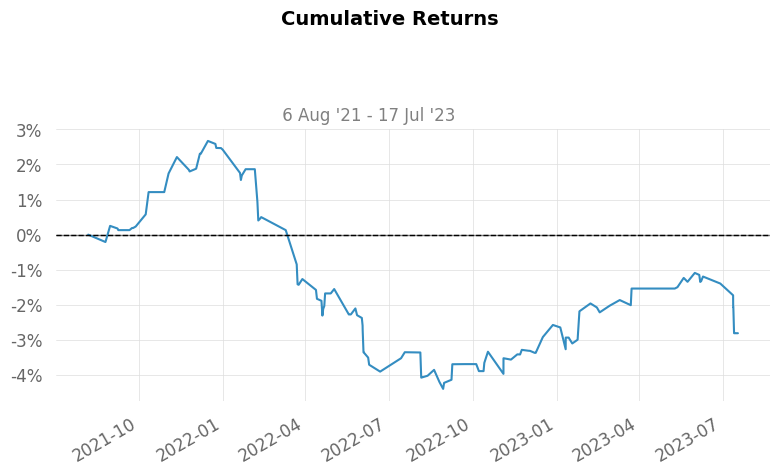

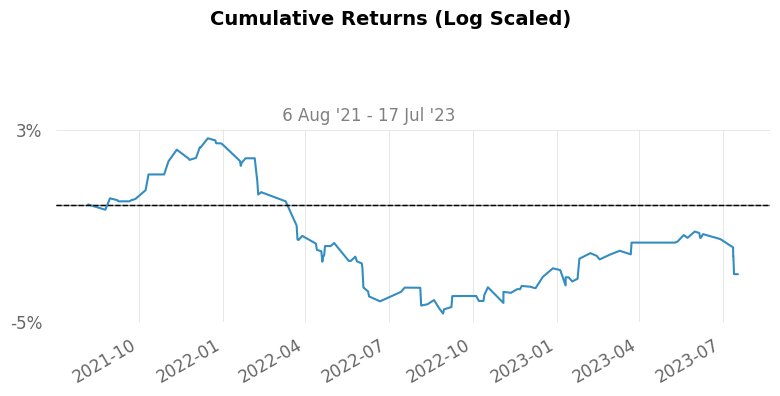

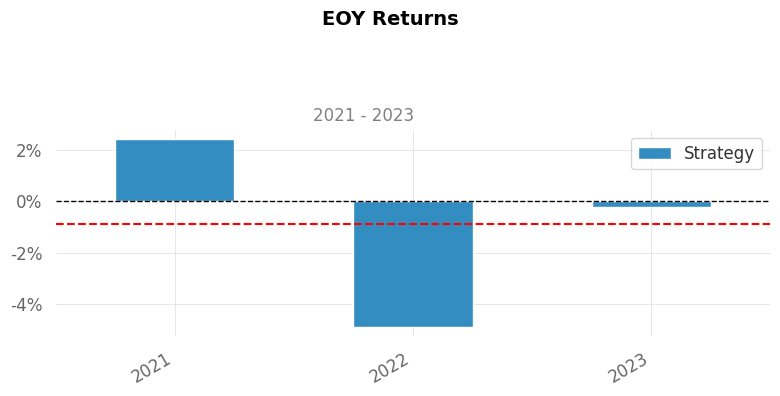

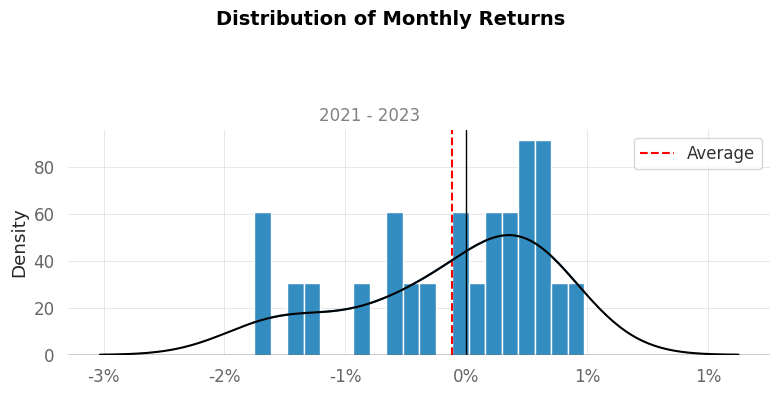

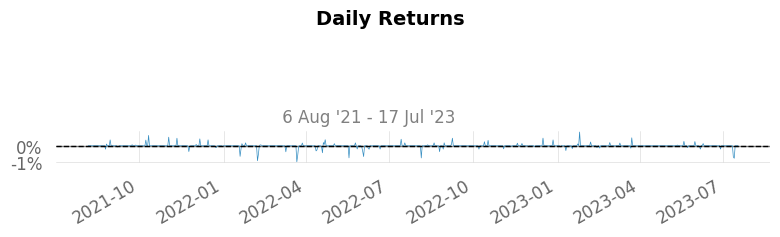

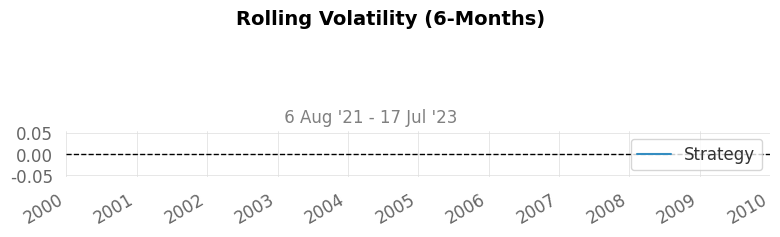

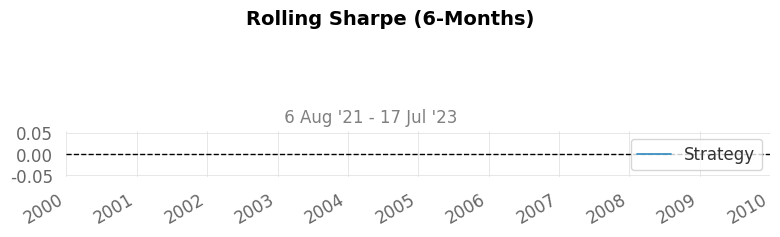

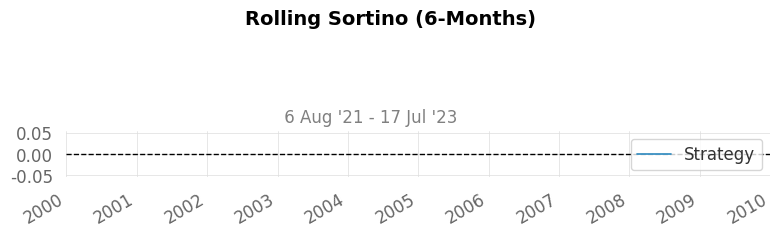

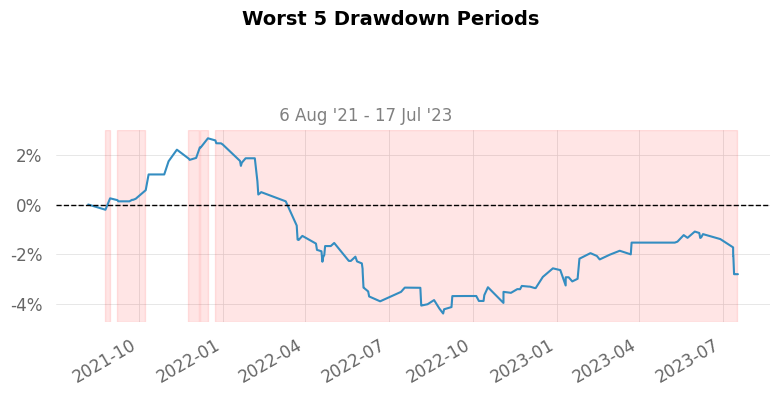

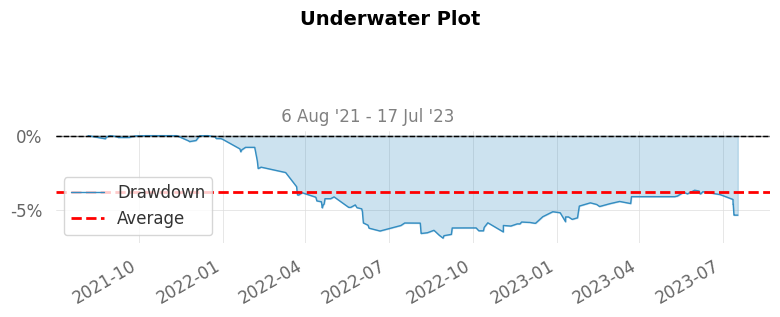

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


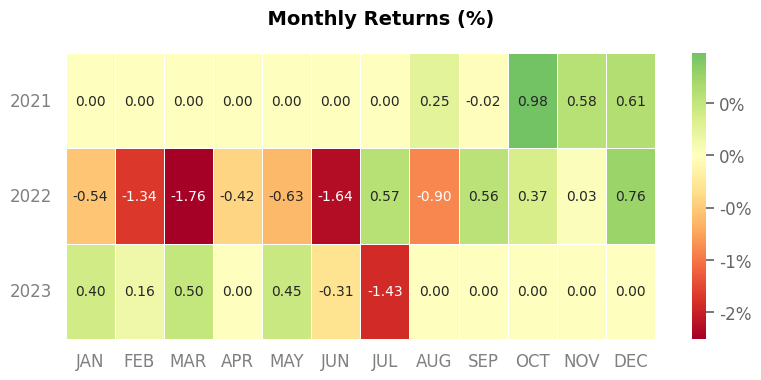

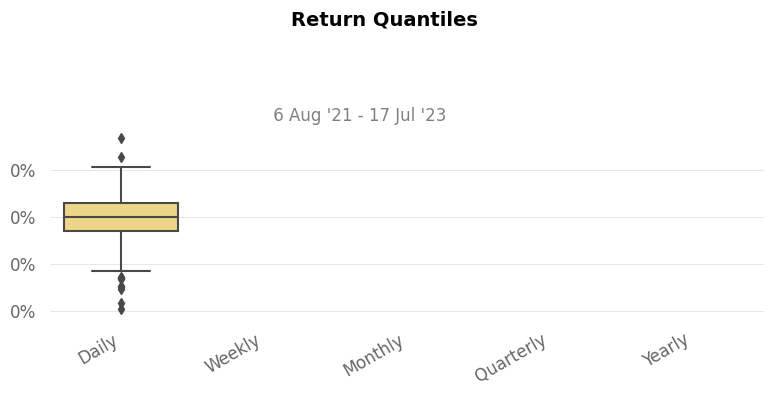

/home/pratikurkude/projects/myenv/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)

+------------------+----------------------------------+
| Order ID         | 4cf8ff164c0e43eb89fdc4d79156c622 |
| Transaction Type | SELL                             |
| Instrument       | NSE:SBIN                         |
| Quantity         | 5                                |
| Price            | ₹602.3                           |
+------------------+----------------------------------+
+-----------------------------+------------------------+
| timestamp_created           | state                  |
|-----------------------------+------------------------|
| 2023-10-23T10:29:50.875892Z | COMPLETE               |
| 2023-10-23T10:29:50.875875Z | OPEN                   |
| 2023-10-23T10:29:50.875856Z | OPEN PENDING           |
| 2023-10-23T10:29:50.875831Z | VALIDATION PENDING     |
| 2023-10-23T10:29:50.875770Z | PUT ORDER REQ RECEIVED |
+-----------------------------+------------------------+

+------------------+----------------------------------+
| Order ID         | e4b0b4ad964f49cab

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---